<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/AICE_GPT_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('auto_mpg.csv')
df.drop('name', axis=1, inplace=True)
df.dropna(how='any', axis=0, inplace=True)

X=df.drop('mpg', axis=1)
y=df['mpg']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [110]:
#1
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [196]:
#2
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 200, random_state = 100)
rf.fit(X_train, y_train)
#피처 중요도가 뭔데 씨발아

RandomForestRegressor(n_estimators=200, random_state=100)

In [197]:
rf.feature_importances_

array([0.08345234, 0.22999186, 0.18598945, 0.28222018, 0.14467286,
       0.06230137, 0.01137195])

In [120]:
#3
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.05, n_estimator = 150, random_state = 42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=150, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [122]:
#4
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [126]:
#5
from sklearn.metrics import r2_score

y_pred = gbr.predict(X_train)
print(r2_score(y_pred, y_train))


0.9015935673567508


In [132]:
#6
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [139]:
#7, 8, 9 안배움
#10
print(lr.coef_)
print(lr.intercept_)
print("6번째 피처의 기울기가 가장 크므로 6번째", X_train.columns[6])

[ -3.85766966   5.41582014  -6.07489129 -22.75698241  -6.98754806
   6.392791     0.58627544]
36.28230067792315
6번째 피처의 기울기가 가장 크므로 6번째 origin


In [158]:
#11
from sklearn.svm import SVR
svr1 = SVR(kernel='rbf', C=10, epsilon=0.2)
svr1.fit(X_train, y_train)

#12
svr2 = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr2.fit(X_train, y_train)

y_pred1, y_pred2 = svr1.predict(X_val), svr2.predict(X_val)
score1 = r2_score(y_pred1, y_val)
score2 = r2_score(y_pred2, y_val)
print(score1, score2)

-4.038123047216591 -1.4372650403392195


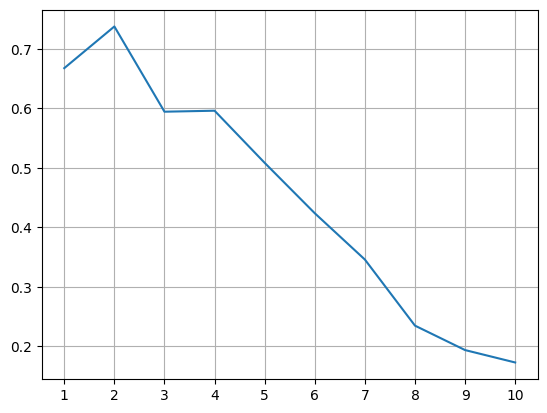

In [156]:
#13
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train_scaled, y_train)

#14
scores = []
for n in range(1,11):
  knr = KNeighborsRegressor(n_neighbors = n)
  knr.fit(X_train_scaled, y_train)
  y_pred = knr.predict(X_val_scaled)

  score = r2_score(y_pred, y_val)
  scores.append(score)

plt.figure()
plt.plot(range(1,11), scores)
plt.xticks(range(1,11))
plt.grid()
plt.show()

In [160]:
#15
lr_pred = lr.predict(X_val)
dt_pred = dt.predict(X_val)
svr_pred = svr.predict(X_val)

lr_score = r2_score(lr_pred, y_val)
dt_score = r2_score(dt_pred, y_val)
svr_score = r2_score(svr_pred, y_val)

print(lr_score, dt_score, svr_score)

-16.490445741301873 0.6303740480679335 -4.038123047216591


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


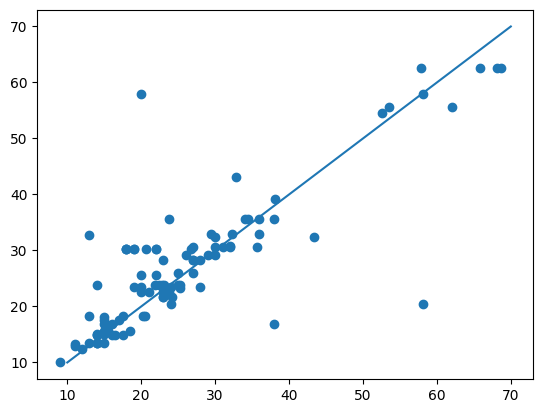

In [178]:
#16
#원래 X_val -> y_val
#예측 X_val -> lr_pred

plt.scatter(y_val, dt_pred)
plt.plot((10,70), (10,70))
plt.show()

In [189]:
#17
#???

#18
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()
param_grid = {'alpha' : [0.01, 0.1, 1.0]}

gs_cv = GridSearchCV(ridge_model, param_grid, n_jobs=-1, refit=True)
gs_cv.fit(X_train, y_train)

ridge_model = gs_cv.best_estimator_
print(gs_cv.best_params_ )


#19
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
param_grid={'max_depth' : [5,6,7,8,9],
            'n_estimators' : [10,20,30]}

gs_cv = GridSearchCV(gbr, param_grid, refit=True, n_jobs=10, cv=3 )
gs_cv.fit(X_train, y_train)
print(gs_cv.best_params_)

{'alpha': 1.0}
{'max_depth': 5, 'n_estimators': 30}


In [194]:
#20
#가장 좋은 모델 : dt
y_pred = dt.predict(X_val)
y_pred[:5]

array([22.65384615, 30.18965517, 23.79409091, 30.18965517, 62.65526316])